In [49]:
import cv2
import matplotlib.pyplot as plt
import os
from os import listdir
from os.path import isfile, join
import numpy

In [62]:

def view_random_image(Correct, Mask):
    list_img = []
    for image in os.listdir(Correct):
        if Mask in image:
            img = cv2.imread(os.path.join(Correct, image))
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            list_img.append(gray)
    return list_img


list_img = view_random_image("./Correct", "12345")


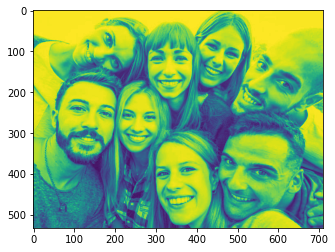

In [56]:
for image in list_img:
    plt.figure()
    plt.imshow(image)

Faces found:  4


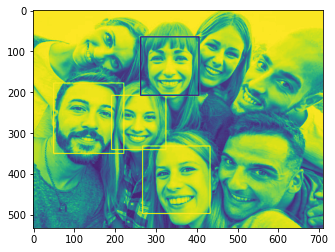

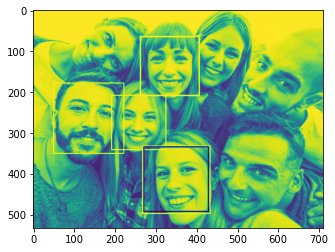

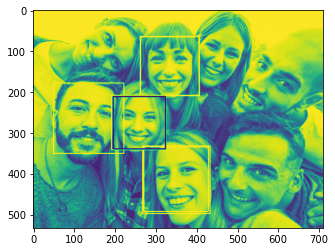

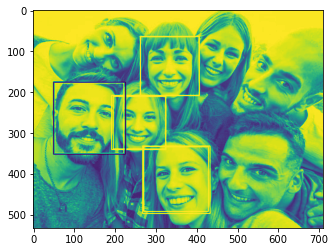

In [58]:
haar_face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
count = 0
for img in list_img:
    faces = haar_face_cascade.detectMultiScale(image)
    print('Faces found: ', len(faces))
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        plt.figure()
        plt.imshow(img)
        face = img[y:y+h, x:x+w] 
        cv2.imwrite(str(count)+'.jpg', face) 
        count+=1
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)